In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('education_career_success.csv')

In [3]:
df

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

In [5]:
#checking null values
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
High_School_GPA,0
SAT_Score,0
University_Ranking,0
University_GPA,0
Field_of_Study,0
Internships_Completed,0
Projects_Completed,0


In [6]:
# To see our interest more specifically
df2 = df[['University_Ranking', 'Starting_Salary', 'Field_of_Study']]

In [7]:
df2

,University_Ranking,Starting_Salary,Field_of_Study
0,291,27200.0,Arts
1,112,25000.0,Law
2,715,42400.0,Medicine
3,170,57400.0,Computer Science
4,599,47600.0,Engineering
...,...,...,...
4995,776,31500.0,Arts
4996,923,41800.0,Law
4997,720,49500.0,Law
4998,319,54700.0,Law


In [8]:
# To be used to study field of study
df_grp=df.groupby(['Field_of_Study']).size()
df_grp  # balanced representation

,0
Field_of_Study,
Arts,749
Business,719
Computer Science,670
Engineering,701
Law,727
Mathematics,745
Medicine,689


In [9]:
df['University_Ranking']

,University_Ranking
0,291
1,112
2,715
3,170
4,599
...,...
4995,776
4996,923
4997,720
4998,319


 To study the effects of university ranking, 4 tiers/classes are created: 1st (0-50), 2nd (51-200), 3rd (201-500), 4th( 500+)


In [10]:
df_bin=df.copy()

In [11]:
df_bin['Universitybin'] = pd.cut(df_bin['University_Ranking'], [0, 50, 200,500,float('inf')], labels=['0-50','51-200','201-500','500+'])

In [12]:
df_bin[['Universitybin', 'University_Ranking', 'Starting_Salary', 'Field_of_Study']]

,Universitybin,University_Ranking,Starting_Salary,Field_of_Study
0,201-500,291,27200.0,Arts
1,51-200,112,25000.0,Law
2,500+,715,42400.0,Medicine
3,51-200,170,57400.0,Computer Science
4,500+,599,47600.0,Engineering
...,...,...,...,...
4995,500+,776,31500.0,Arts
4996,500+,923,41800.0,Law
4997,500+,720,49500.0,Law
4998,201-500,319,54700.0,Law


<ipython-input-13-b9c92f18bb1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Universitybin', y='Starting_Salary', data=df_bin, order=['0-50', '51-200', '201-500', '500+'],palette="viridis")


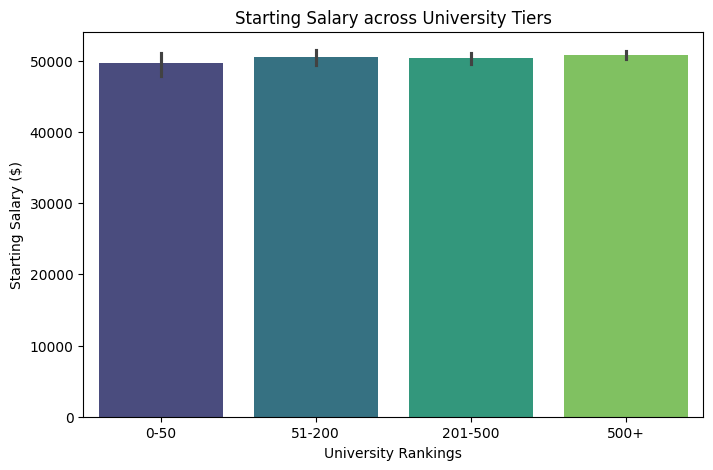

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='Universitybin', y='Starting_Salary', data=df_bin, order=['0-50', '51-200', '201-500', '500+'],palette="viridis")
plt.title("Starting Salary across University Tiers")
plt.xlabel("University Rankings")
plt.ylabel("Starting Salary ($)")
plt.show()

We can see there is barely no difference in starting salary for the 4 different university ranking bins, which is a little odd..

In [14]:
# checking numbers just to see
df_bin.groupby("Universitybin")["Starting_Salary"].describe()


<ipython-input-14-d99e21758542>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bin.groupby("Universitybin")["Starting_Salary"].describe()


,count,mean,std,min,25%,50%,75%,max
Universitybin,,,,,,,,
0-50,252.0,49634.126984,13453.687198,25000.0,40200.0,48700.0,58900.0,101000.0
51-200,728.0,50496.978022,14668.507346,25000.0,39175.0,50150.0,60800.0,97500.0
201-500,1516.0,50368.337731,14359.856959,25000.0,40400.0,49900.0,59800.0,98900.0
500+,2504.0,50794.608626,14628.695376,25000.0,40200.0,50900.0,60800.0,100600.0


<ipython-input-15-a25035fb4cce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Field_of_Study', y='Starting_Salary', data=df_bin, palette="colorblind")


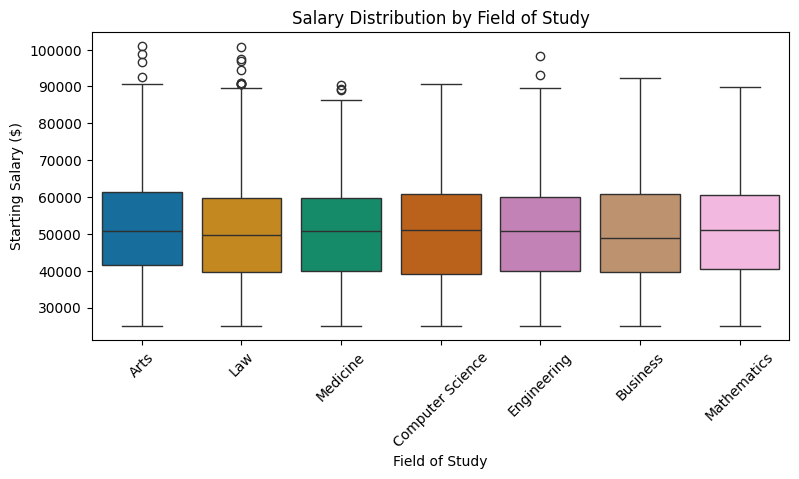

In [15]:
# Studying starting salary ditribution across different field of studies
plt.figure(figsize=(9, 4))
sns.boxplot(x='Field_of_Study', y='Starting_Salary', data=df_bin, palette="colorblind")
plt.xticks(rotation=45)
plt.title("Salary Distribution by Field of Study")
plt.xlabel("Field of Study")
plt.ylabel("Starting Salary ($)")
plt.show()


The Median is almost very similar for all fields of study, with business at a lower median salary...
Salary distributions are fairly similar across fields, with overlapping medians...how is that possible?

<ipython-input-16-3a46175aae6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Universitybin', y='Starting_Salary', data=df_bin, order=['0-50', '51-200', '201-500', '500+'], palette="pastel")


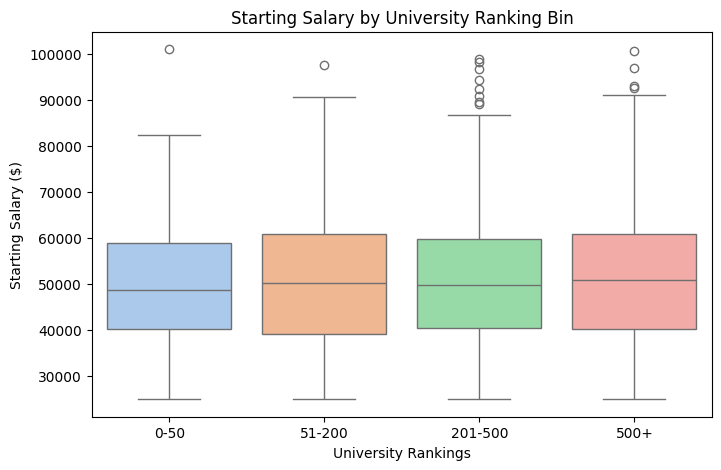

In [16]:
# Another visual like the first graph, but using wisker plots shows the outliers as well
plt.figure(figsize=(8, 5))
sns.boxplot(x='Universitybin', y='Starting_Salary', data=df_bin, order=['0-50', '51-200', '201-500', '500+'], palette="pastel")
plt.title("Starting Salary by University Ranking Bin")
plt.xlabel("University Rankings")
plt.ylabel("Starting Salary ($)")
plt.show()
#observations: The median salaries look similar across all bins, suggesting that university ranking may not have
#a strong effect on median salary

The median salaries look similar across all bins, suggesting that university ranking may not have a strong effect on median salary

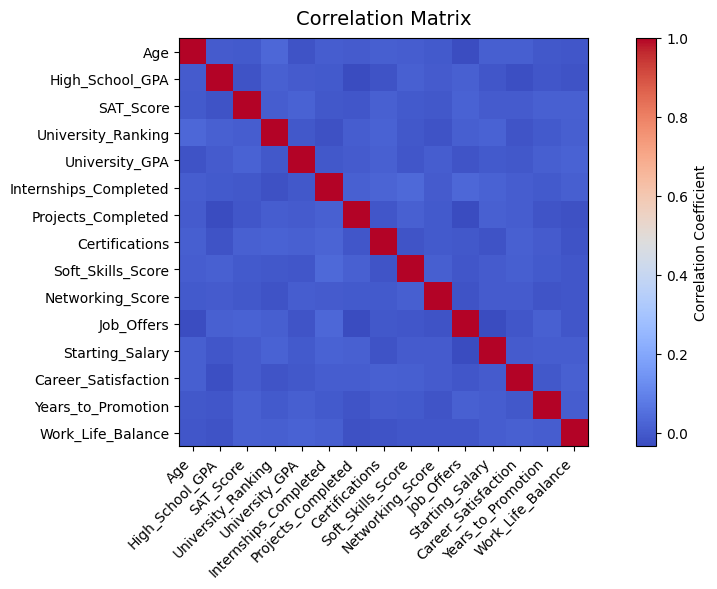

In [17]:
# Since there has been no visible correlation, we checked correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')

plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(corr.index)), labels=corr.columns)
plt.grid(False)
plt.title('Correlation Matrix', fontsize=14, pad=10)
plt.tight_layout()

plt.show()


There is no correlation whatsover. Nothing is being influenced by anything else

Conclusion: Using this dataset, University ranking alone doesn't explain most/any of the variation in starting salary

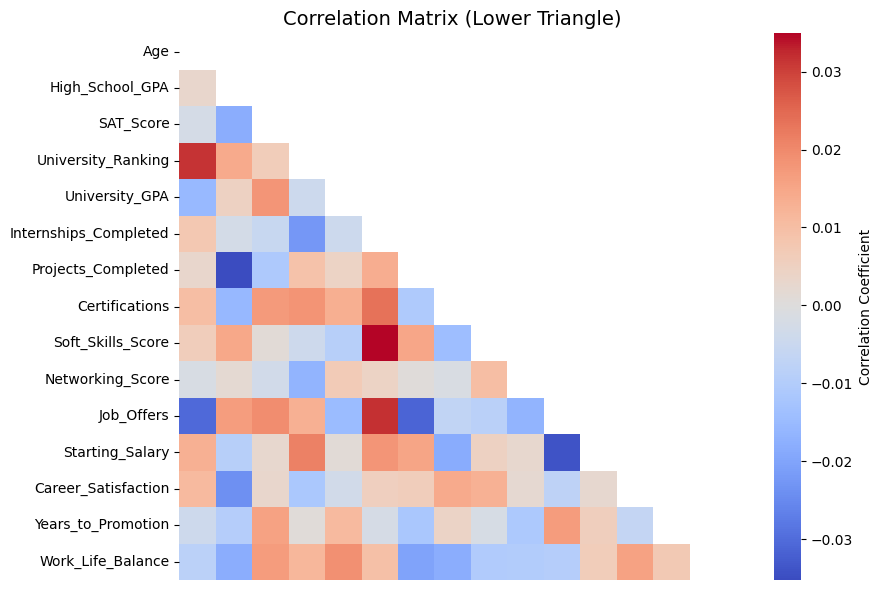

In [18]:
# This was created for a cleaner look and concise for presentation/paper
# Scale was adjusted by Seaborn automatically to min and max values in correaltin matrix because there is almost no correaltion, so if the scale was
#left at -1,1. The graph will be very washed out and mostly white.
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(corr,
            mask=mask,
            cmap='coolwarm',
            square=True,
            cbar_kws={"label": "Correlation Coefficient"},
            xticklabels=False,
            yticklabels=True,
            annot=False)


plt.title("Correlation Matrix (Lower Triangle)", fontsize=14)
plt.tight_layout()
plt.show()


Almost no strong correlations, all values are extremely close to 0. Non of variables have a meaningful linear relationship.

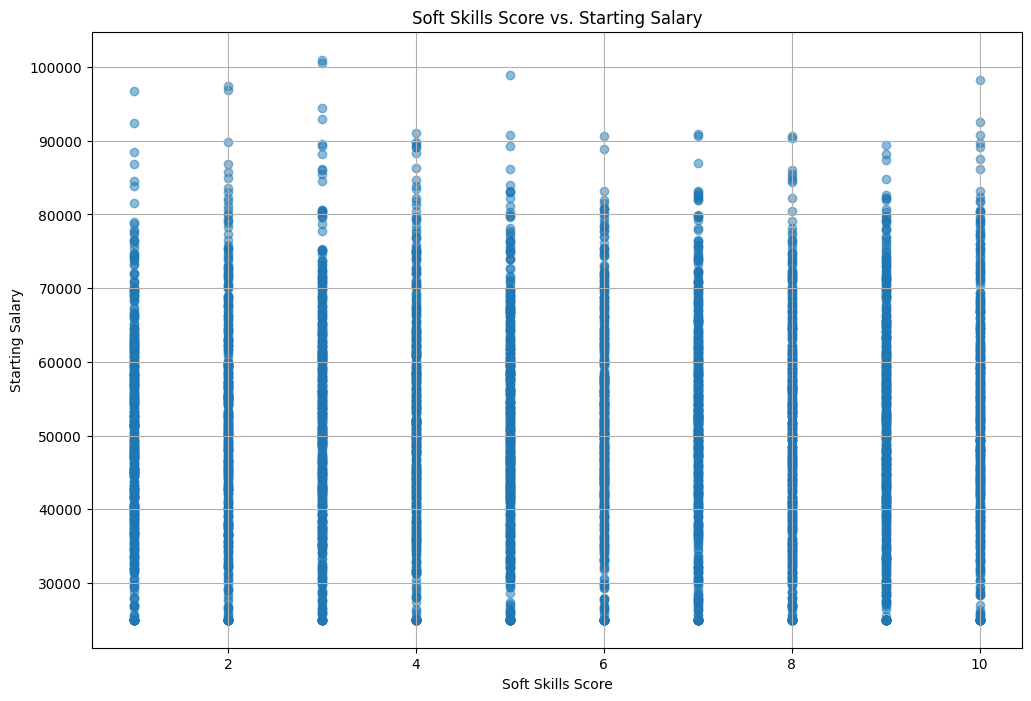

In [19]:
# Just looking at some last visuals:
plt.figure(figsize=(12, 8))
plt.scatter(df['Soft_Skills_Score'], df['Starting_Salary'], alpha=0.5)
plt.title('Soft Skills Score vs. Starting Salary')
plt.xlabel('Soft Skills Score')
plt.ylabel('Starting Salary')
plt.grid()
plt.show()

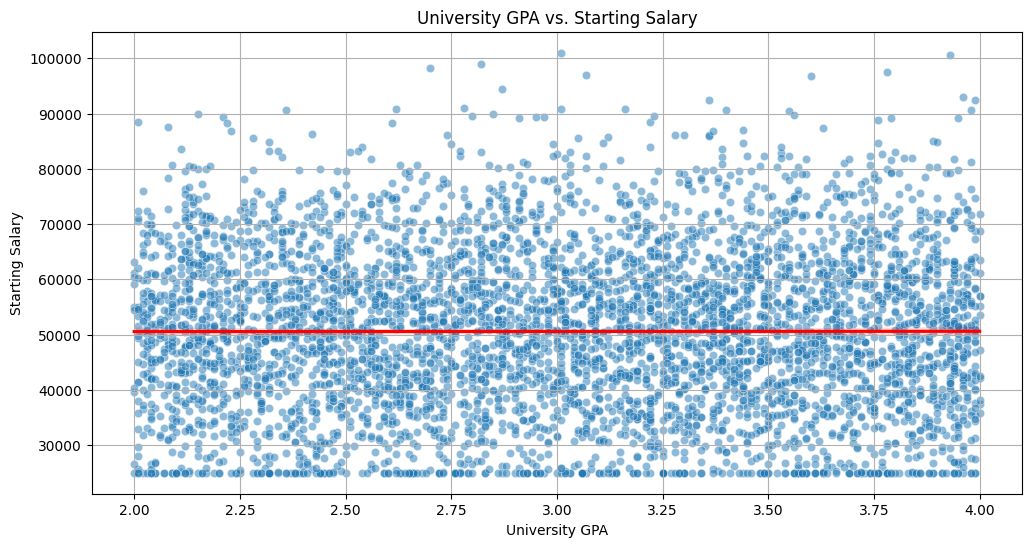

In [20]:
# Starting salary vs GPA
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='University_GPA', y='Starting_Salary', alpha=0.5)
sns.regplot(data=df, x='University_GPA', y='Starting_Salary', scatter=False, color='red')

plt.title('University GPA vs. Starting Salary')
plt.xlabel('University GPA')
plt.ylabel('Starting Salary')
plt.grid()
plt.show()

Students across all GPA levels (2.0–4.0) are earning very similar starting salaries

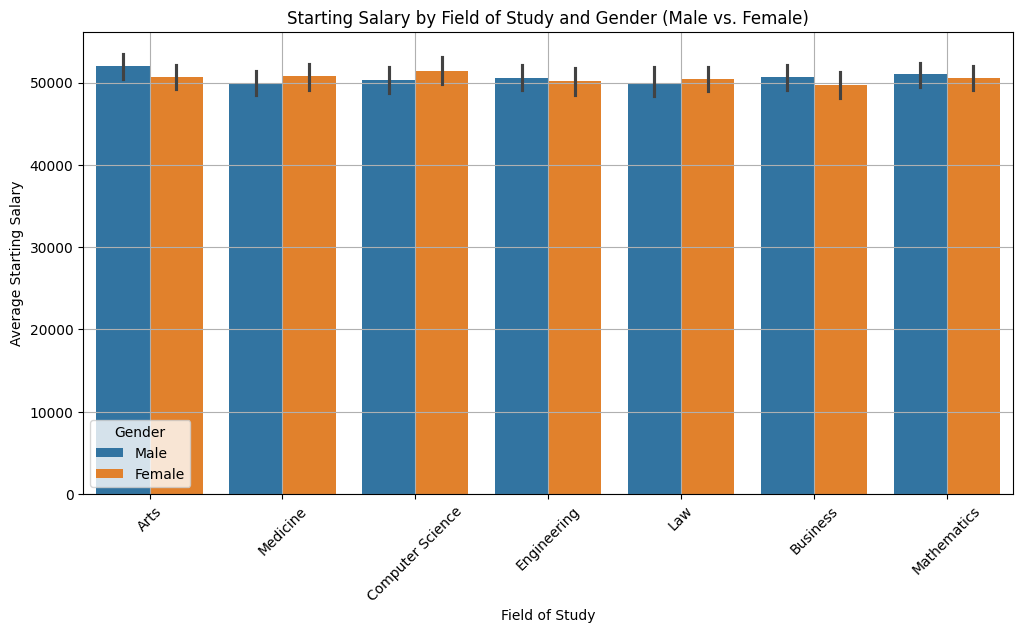

In [21]:
# Gender vs Starting Salary
df_gender_filtered = df[df['Gender'].isin(['Male', 'Female'])]

plt.figure(figsize=(12, 6))
sns.barplot(data=df_gender_filtered, x='Field_of_Study', y='Starting_Salary', hue='Gender')
plt.title('Starting Salary by Field of Study and Gender (Male vs. Female)')
plt.xlabel('Field of Study')
plt.ylabel('Average Starting Salary')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid()
plt.show()

barely no difference

# It is hard to make a conclusion from this data set alone, we will be looking at other datasets


In [22]:
# We exported the dataframe into csv for tableau
df2.to_excel('CLEAN DATA SET 1.xlsx', index=False)